# Restaurant Cuisine Requirement Prediction

## Problem Statement 

We have to generate a top-n list of restaurants in Bangalore based on their Ratings, Location, cuisine and many more. We have to
find significant features for making predictions and that will help employee management. So they will improve their business by 
next month according to customer preferences. 

## Data set Description

Columns Provided in the Dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the dataset
df = pd.read_csv('restaurant_data.csv')

In [3]:
# print top five rows of the dataset
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),order_date
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,2022-03-23
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,2022-04-16
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,2022-03-14
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2022-05-09
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2022-03-19


# Exploratory Data Analysis

In [4]:
# Getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [5]:
# knowing the how many rows and columns
df.shape

(51717, 18)

In [6]:
# columns present in the dataset
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'order_date'],
      dtype='object')

In [7]:
# checking null values in the dataset
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
order_date                         0
dtype: int64

<AxesSubplot:>

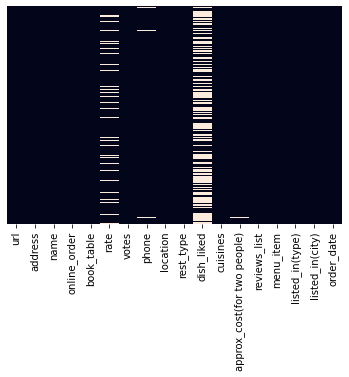

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [9]:
# drop unnecessary columns(or having more null values )
df.drop(columns=['dish_liked','url','phone'],axis=1,inplace=True)

In [10]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),order_date
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,2022-03-23
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,2022-04-16
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,2022-03-14
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2022-05-09
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2022-03-19


In [11]:
df.isnull().sum()

address                           0
name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
order_date                        0
dtype: int64

<AxesSubplot:>

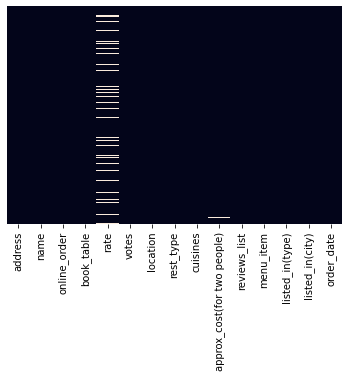

In [12]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [13]:
# we will handle missing values by replacing them with the 'Mode' value
# We can do this because of these are all Categorical features
df['location']=df['location'].fillna(df['location'].mode()[0])
df['rate']=df['rate'].fillna(df['rate'].mode()[0])
df['rest_type']=df['rest_type'].fillna(df['rest_type'].mode()[0])
df['cuisines']=df['cuisines'].fillna(df['cuisines'].mode()[0])
df['approx_cost(for two people)']=df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mode()[0])

In [14]:
df.shape

(51717, 15)

In [15]:
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
order_date                     0
dtype: int64

<AxesSubplot:>

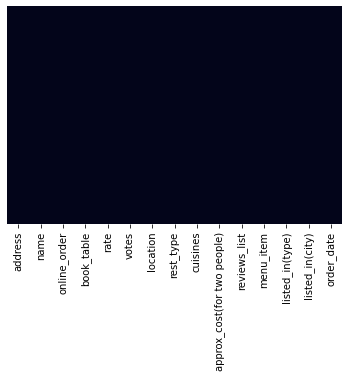

In [16]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [17]:
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
order_date                     0
dtype: int64

In [18]:
# We can rename all the columns with other names
df = df.rename(columns={'address':'Address','name':'Name','online_order':'Online_Order','approx_cost(for two people)':'Cost','book_table':'Dine_In','rate':'Rating',
                        'votes':'Votes','location':'Location','rest_type':'Rest_type','cuisines':'Cuisines',
                        'reviews_list':'Reviews','menu_item':'Menu','listed_in(type)':'Type','listed_in(city)':'City'})
df.head()

,Address,Name,Online_Order,Dine_In,Rating,Votes,Location,Rest_type,Cuisines,Cost,Reviews,Menu,Type,City,order_date
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,2022-03-23
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,2022-04-16
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,2022-03-14
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,2022-05-09
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,2022-03-19


In [19]:
df.drop(columns=['Address','Reviews','order_date'],axis=1,inplace=True)

In [20]:
df.head()

,Name,Online_Order,Dine_In,Rating,Votes,Location,Rest_type,Cuisines,Cost,Menu,Type,City
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,[],Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,[],Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,[],Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,[],Buffet,Banashankari


In [21]:
df.shape

(51717, 12)

In [22]:
df['Rating'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [23]:
# we can remove 'NEW' and '/5' in the rate column
# we can change datatype 'String' to 'Float'
df = df.loc[df.Rating !='NEW']
df = df.loc[df.Rating !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
df.Rating = df.Rating.apply(remove_slash).astype('float')
df['Rating'].head()

C:\Users\RSIVAK~1\AppData\Local\Temp/ipykernel_7612/1103411473.py:5: DeprecationWarning: `np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x


0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: Rating, dtype: float64

In [24]:
# # convert 'object' dtype to 'string'
df['Cost'] = df['Cost'].astype(str)

In [25]:
df['Cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '1,100', '1,600', '230',
       '130', '1,700', '1,350', '2,200', '1,400', '2,000', '1,800',
       '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400',
       '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600', '1,450',
       '70', '3,200', '240', '6,000', '1,050', '2,300', '4,100', '120',
       '5,000', '3,700', '1,650', '2,700', '4,500', '80'], dtype=object)

In [26]:
# Above We have ','(1,100 & 2,000 .....) we can replace that with '.' using lambda function
df['Cost'] = df['Cost'].apply(lambda x: x.replace(',','.')) 
# convert 'string' dtype to 'float' 
df['Cost'] = df['Cost'].astype(float)

In [27]:
# Check the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41665 entries, 0 to 41664
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          41665 non-null  object 
 1   Online_Order  41665 non-null  object 
 2   Dine_In       41665 non-null  object 
 3   Rating        41665 non-null  float64
 4   Votes         41665 non-null  int64  
 5   Location      41665 non-null  object 
 6   Rest_type     41665 non-null  object 
 7   Cuisines      41665 non-null  object 
 8   Cost          41665 non-null  float64
 9   Menu          41665 non-null  object 
 10  Type          41665 non-null  object 
 11  City          41665 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 3.8+ MB


In [28]:
df["Online_Order"].unique()

array(['Yes', 'No'], dtype=object)

In [29]:
df["Dine_In"].unique()

array(['Yes', 'No'], dtype=object)

In [30]:
# We can replace 0,1 values inplace of yes,No.
df['Online_Order'].replace({'Yes':1,'No':0},inplace=True)

In [31]:
# Similarly, for dine_in column also we are replacing 0,1 values
df['Dine_In'].replace({'Yes':1,'No':0},inplace=True)

In [32]:
df.head()

,Name,Online_Order,Dine_In,Rating,Votes,Location,Rest_type,Cuisines,Cost,Menu,Type,City
0,Jalsa,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari
1,Spice Elephant,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari
2,San Churro Cafe,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari
3,Addhuri Udupi Bhojana,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,[],Buffet,Banashankari
4,Grand Village,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,[],Buffet,Banashankari


In [33]:
data = df.copy()

In [34]:
data.drop(columns=['Name'],axis=1,inplace=True)

In [35]:
data.head()

,Online_Order,Dine_In,Rating,Votes,Location,Rest_type,Cuisines,Cost,Menu,Type,City
0,1,1,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,[],Buffet,Banashankari
1,1,0,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,[],Buffet,Banashankari
2,1,0,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,[],Buffet,Banashankari
3,0,0,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,[],Buffet,Banashankari
4,0,0,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,[],Buffet,Banashankari


# Encoding

In [36]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
data['Location']= label_encoder.fit_transform(data['Location'])
  
data['Location'].unique()

array([ 1,  4, 56, 31, 48, 67, 86, 83, 29, 79, 13,  3,  0, 37,  7, 19, 75,
       89, 77, 44, 70, 22, 46,  6, 55, 88, 17, 61, 27, 40, 20, 51,  8, 50,
       12, 82, 69, 78, 28, 80, 15, 65, 14, 85, 16, 47, 18, 32, 62, 76, 36,
       45, 53, 49, 11,  9, 26, 84, 41, 42, 43, 39, 25, 64,  2, 60, 58, 24,
       35, 21, 68, 81, 10, 34, 38, 74, 54, 73, 71,  5, 66, 91, 59, 87, 52,
       90, 72, 30, 23, 57, 63, 33])

In [37]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Location'.
data['Location']= label_encoder.fit_transform(data['Location'])
  
data['Location'].unique()

array([ 1,  4, 56, 31, 48, 67, 86, 83, 29, 79, 13,  3,  0, 37,  7, 19, 75,
       89, 77, 44, 70, 22, 46,  6, 55, 88, 17, 61, 27, 40, 20, 51,  8, 50,
       12, 82, 69, 78, 28, 80, 15, 65, 14, 85, 16, 47, 18, 32, 62, 76, 36,
       45, 53, 49, 11,  9, 26, 84, 41, 42, 43, 39, 25, 64,  2, 60, 58, 24,
       35, 21, 68, 81, 10, 34, 38, 74, 54, 73, 71,  5, 66, 91, 59, 87, 52,
       90, 72, 30, 23, 57, 63, 33], dtype=int64)

In [38]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Rest_type'.
data['Rest_type']= label_encoder.fit_transform(data['Rest_type'])
  
data['Rest_type'].unique()

array([24, 19, 73, 26, 16, 76, 23, 36, 62, 37,  3, 68,  0, 86, 46, 11, 83,
        6, 44,  5, 84, 56, 55, 77, 14, 13, 85, 71, 25, 39, 74, 65, 57,  7,
       50, 17, 45, 82, 63, 54, 75, 69, 30, 58, 43, 53, 32, 52, 29, 60, 21,
       12, 20, 40, 38, 67,  4, 33, 78,  2, 70, 27, 48, 10, 35, 72, 66, 49,
       47, 42, 15, 31, 18, 28,  1, 64, 22,  9, 59, 34, 81, 80, 79, 61, 51,
       41,  8])

In [39]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Cuisines'.
data['Cuisines']= label_encoder.fit_transform(data['Cuisines'])
  
data['Cuisines'].unique()

array([1908,  820,  657, ..., 2370, 2010, 1674])

In [40]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Type'.
data['Type']= label_encoder.fit_transform(data['Type'])
  
data['Type'].unique()

array([0, 1, 2, 3, 4, 5, 6])

In [41]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'Menu'.
data['Menu']= label_encoder.fit_transform(data['Menu'])
  
data['Menu'].unique()

array([8270, 2644, 2754, ..., 8035, 2412, 3128])

In [42]:
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'City'.
data['City']= label_encoder.fit_transform(data['City'])
  
data['City'].unique()

array([ 1,  2,  3,  4,  5,  6,  0,  7,  8,  9, 10, 11, 13, 12, 14, 15, 16,
       17, 18, 19, 20, 22, 23, 21, 24, 25, 26, 27, 28, 29])

In [43]:
data.head()

,Online_Order,Dine_In,Rating,Votes,Location,Rest_type,Cuisines,Cost,Menu,Type,City
0,1,1,4.1,775,1,24,1908,800.0,8270,0,1
1,1,0,4.1,787,1,24,820,800.0,8270,0,1
2,1,0,3.8,918,1,19,657,800.0,8270,0,1
3,0,0,3.7,88,1,73,2236,300.0,8270,0,1
4,0,0,3.8,166,4,24,1935,600.0,8270,0,1


In [44]:
data.head()

,Online_Order,Dine_In,Rating,Votes,Location,Rest_type,Cuisines,Cost,Menu,Type,City
0,1,1,4.1,775,1,24,1908,800.0,8270,0,1
1,1,0,4.1,787,1,24,820,800.0,8270,0,1
2,1,0,3.8,918,1,19,657,800.0,8270,0,1
3,0,0,3.7,88,1,73,2236,300.0,8270,0,1
4,0,0,3.8,166,4,24,1935,600.0,8270,0,1


# Heatmap

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize 
simple or complex information.
Using heatmaps plot the correlation between the features present in the dataset.

In [45]:
cor = data.corr()
cor

,Online_Order,Dine_In,Rating,Votes,Location,Rest_type,Cuisines,Cost,Menu,Type,City
Online_Order,1.000000,-0.050980,0.068479,-0.013105,-0.074039,0.032518,-0.016818,0.180777,-0.361877,-0.237585,-0.057948
Dine_In,-0.050980,1.000000,0.424631,0.392491,0.091430,-0.241998,-0.015264,-0.265629,0.040359,0.113533,0.024815
Rating,0.068479,0.424631,1.000000,0.434040,0.087809,-0.226596,-0.088045,-0.115298,-0.045943,0.034274,0.017977
Votes,-0.013105,0.392491,0.434040,1.000000,0.046737,-0.144254,-0.048134,-0.115823,0.001421,0.069420,0.021013
Location,-0.074039,0.091430,0.087809,0.046737,1.000000,-0.063569,-0.003496,-0.067656,0.020893,0.049983,0.309106
Rest_type,0.032518,-0.241998,-0.226596,-0.144254,-0.063569,1.000000,0.280274,-0.202802,-0.014395,0.033962,-0.000156
Cuisines,-0.016818,-0.015264,-0.088045,-0.048134,-0.003496,0.280274,1.000000,-0.107943,0.033948,0.056493,-0.005999
Cost,0.180777,-0.265629,-0.115298,-0.115823,-0.067656,-0.202802,-0.107943,1.000000,-0.061825,-0.154770,-0.026561
Menu,-0.361877,0.040359,-0.045943,0.001421,0.020893,-0.014395,0.033948,-0.061825,1.000000,0.106374,-0.032786
Type,-0.237585,0.113533,0.034274,0.069420,0.049983,0.033962,0.056493,-0.154770,0.106374,1.000000,0.032711


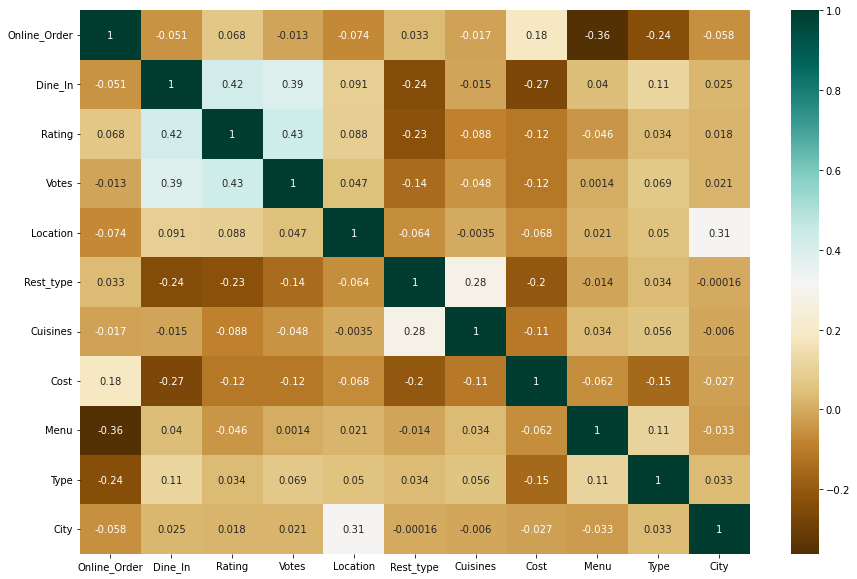

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(cor,cmap='BrBG',annot=True)
plt.show()

In [47]:
data.head()

,Online_Order,Dine_In,Rating,Votes,Location,Rest_type,Cuisines,Cost,Menu,Type,City
0,1,1,4.1,775,1,24,1908,800.0,8270,0,1
1,1,0,4.1,787,1,24,820,800.0,8270,0,1
2,1,0,3.8,918,1,19,657,800.0,8270,0,1
3,0,0,3.7,88,1,73,2236,300.0,8270,0,1
4,0,0,3.8,166,4,24,1935,600.0,8270,0,1


# Data Preprocessing

### Splitting the dataset into train and test set

In [48]:
X = data.iloc[:,[0,1,3,4,5,6,7,8,9]]
y = data['Rating']
#Getting Test and Training Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=100)

In [49]:
X_train.head()

,Online_Order,Dine_In,Votes,Location,Rest_type,Cuisines,Cost,Menu,Type
32179,1,1,355,5,26,2043,600.0,3694,3
13180,1,0,23,75,73,1111,150.0,8270,2
32620,1,0,157,55,73,1750,300.0,8270,2
12313,1,0,9,20,73,2090,500.0,8270,4
30813,1,1,60,51,16,616,800.0,6091,3


In [50]:
y_train.head()

32179    4.3
13180    3.5
32620    4.5
12313    3.0
30813    4.1
Name: Rating, dtype: float64

### Now we can understanding the features by visualization

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

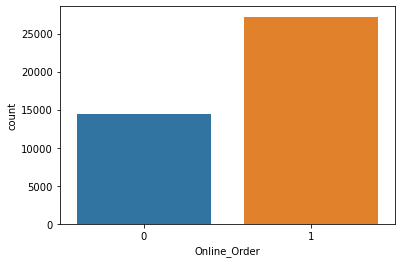

<Figure size 720x720 with 0 Axes>

In [51]:
# Restaurants delivering Online or not
sns.countplot(data['Online_Order'])
plt.figure(figsize=(10,10))

Above fig shows that restaurents delivering online (0-No, 1-Yes)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 720x720 with 0 Axes>

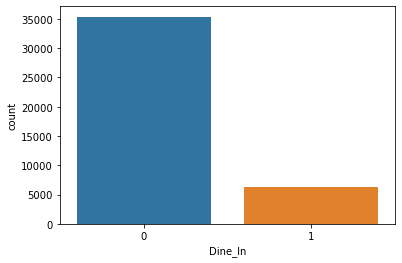

<Figure size 720x720 with 0 Axes>

In [52]:
sns.countplot(data['Dine_In'])
plt.figure(figsize=(10,10))

Now above fig says restaurents not allowing for Dine_In. (0-NO,1-Yes)

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Location wise count for restaurants')

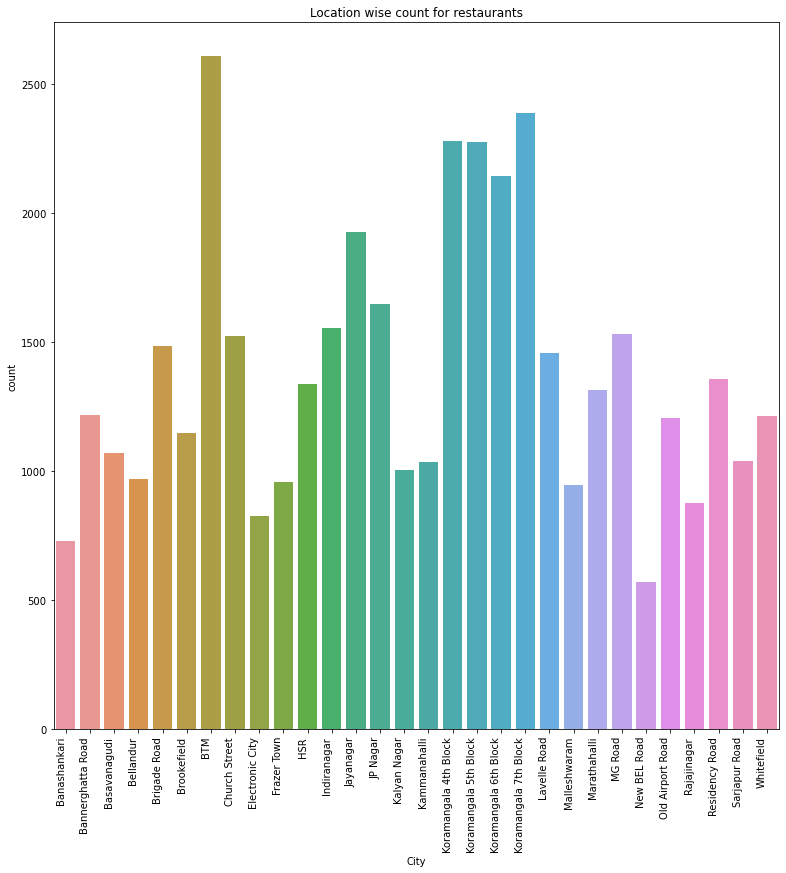

In [53]:
sns.countplot(df['City'])
sns.countplot(df['City']).set_xticklabels(sns.countplot(df['City']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,13)
plt.title('Location wise count for restaurants')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Restaurent type')

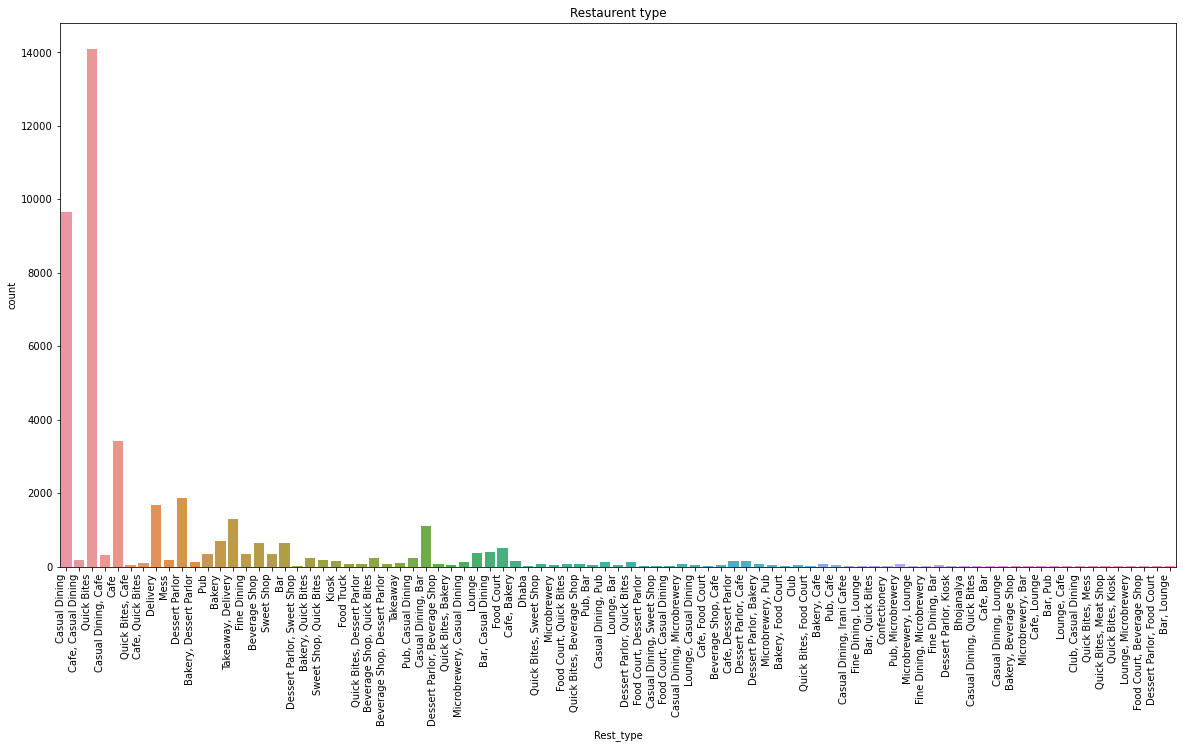

In [54]:
sns.countplot(df['Rest_type'])
sns.countplot(df['Rest_type']).set_xticklabels(sns.countplot(df['Rest_type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.title('Restaurent type')

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Services type')

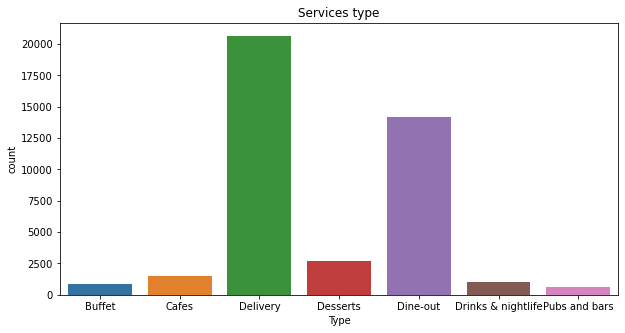

In [55]:
plt.figure(figsize=(10,5))
sns.countplot(df['Type'])
plt.title('Services type')

We can understand which type of services are used mostly i.e Delivery used by most of the customers.

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Cost')

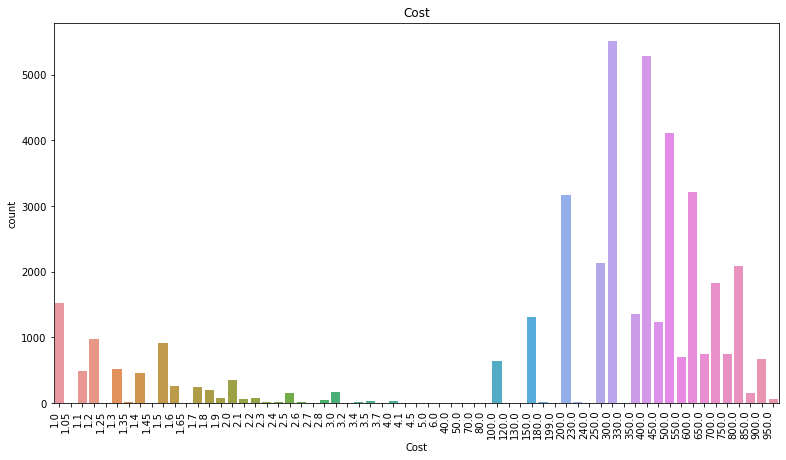

In [56]:
sns.countplot(df['Cost'])
sns.countplot(df['Cost']).set_xticklabels(sns.countplot(df['Cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(13,7)
plt.title('Cost')

Text(0.5, 1.0, 'Restaurants in a Location')

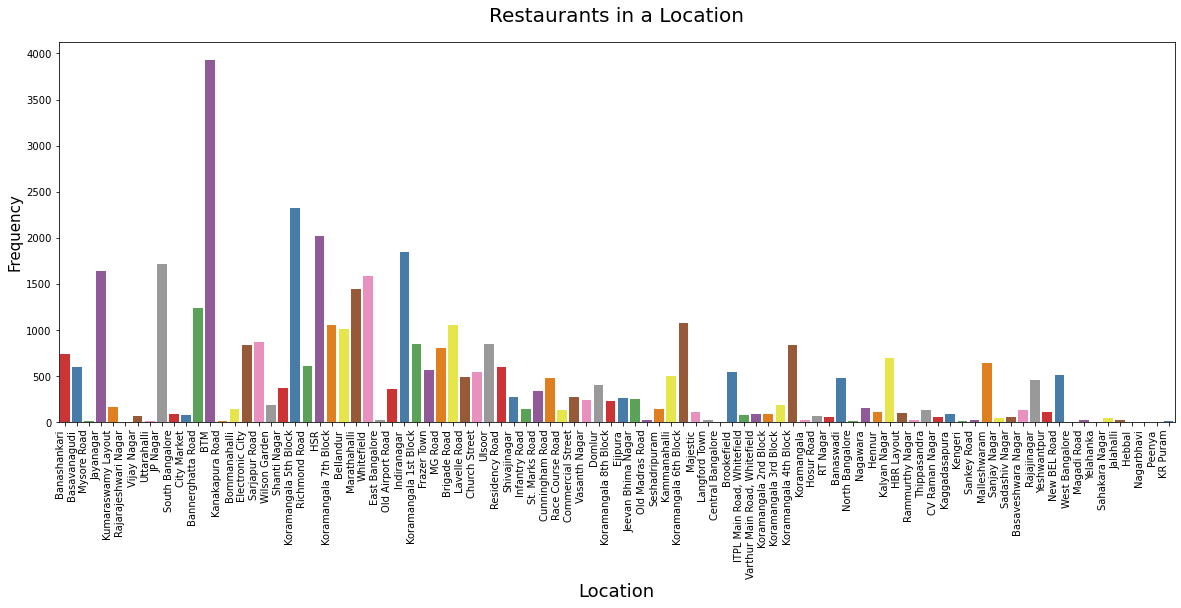

In [57]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="Location",data=df, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('Restaurants in a Location',size = 20,pad=20)

Text(0.5, 0, 'Number of locations')

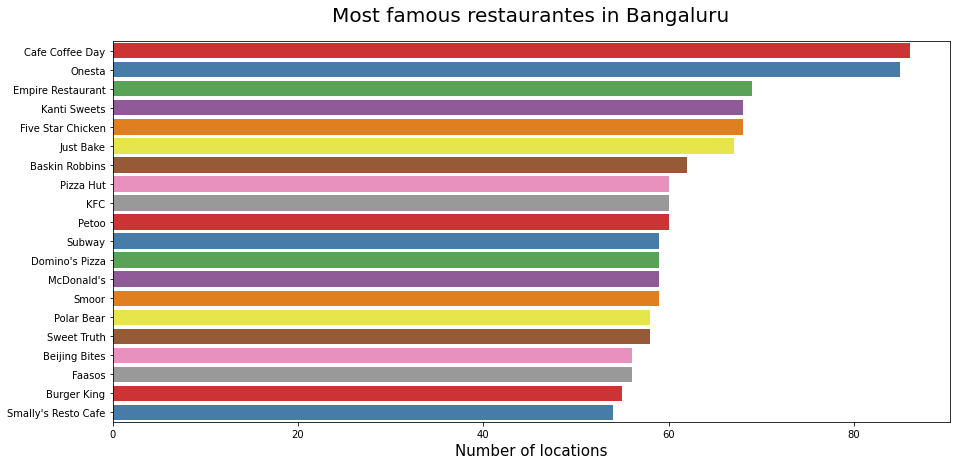

In [58]:
plt.figure(figsize=(15,7))
chains=df['Name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurantes in Bangaluru",size=20,pad=20)
plt.xlabel("Number of locations",size=15)

# Model Building

## LinearRegression

In [59]:
# import LinearRegression module
from sklearn.linear_model import LinearRegression

# Instantiate the linear regression object lm
lm = LinearRegression()

# Fit and train the model using training data sets
lm.fit(X_train, y_train)

# Predict on the test data
y_pred = lm.predict(X_test)

In [60]:
y_pred

array([3.70087084, 3.54663991, 3.66479   , ..., 3.78819481, 3.67535233,
       3.72070727])

In [61]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.29836728382696576

## DecisionTreeRegressor

In [62]:
# import DecisionTreeRegressor module
from sklearn.tree import DecisionTreeRegressor

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.1,random_state=105)

# Instantiate the regressor
DTree=DecisionTreeRegressor(min_samples_leaf=.0001)

# Fit and train the model using training data sets
DTree.fit(X_train,y_train)

# Predict on the test data
y1_pred=DTree.predict(X_test)

In [63]:
y1_pred

array([3.02857143, 3.7       , 3.7       , ..., 3.9       , 3.72      ,
       3.06666667])

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test,y1_pred)

0.8311818560439856

## RandomForestRegressor

In [65]:
# Preparing Random Forest REgression
from sklearn.ensemble import RandomForestRegressor

# Instantiate the regressor
RForest=RandomForestRegressor(n_estimators=500,random_state=329,min_samples_leaf=.0001)

# Fit and train the model using training data sets
RForest.fit(X_train,y_train)

# Predict on the test data
y2_pred=RForest.predict(X_test)

In [66]:
y2_pred

array([2.98116131, 3.68836374, 3.69463319, ..., 3.92609262, 3.58702306,
       3.20060857])

In [67]:
r2_score(y_test,y2_pred)

0.8822266334422294

## KNN Regressor

In [68]:
# Preparing KNeighborResgressor
from sklearn.neighbors import KNeighborsRegressor

# Instantiate the regressor
knr = KNeighborsRegressor()

# Fit and train the model using training data sets
knr.fit(X_train,y_train)

# Predict on the test data
y4_pred=knr.predict(X_test)

In [69]:
y4_pred

array([2.9 , 3.46, 3.7 , ..., 4.26, 3.68, 3.22])

In [70]:
from sklearn.metrics import r2_score
r2_score(y_test,y4_pred)

0.7152088593291072

## ExtraTreesRegressor

In [71]:
# Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor

# Instantiate the regressor
ETree=ExtraTreesRegressor(n_estimators = 100)

# Fit and train the model using training data sets
ETree.fit(X_train,y_train)

# Predict on the test data
y4_pred=ETree.predict(X_test)

In [72]:
y4_pred

array([2.83333333, 3.7       , 3.7       , ..., 3.951     , 3.6       ,
       3.        ])

## Model Evaluation

R Square - Evaluation matrix

In [73]:
r2_score(y_test,y4_pred)

0.9435635911956162

We got good accuracy for Extratreeregressor.

## Hyper Parameter tuning

In [74]:
## Predicted values

In [75]:
Prediction = pd.DataFrame(y4_pred)

In [76]:
Prediction

,0
0,2.833333
1,3.700000
2,3.700000
3,3.460000
4,3.175000
...,...
4162,3.100000
4163,4.100000
4164,3.951000
4165,3.600000


##  Conclusion

### We can Predict that " Coffee day", "Onesta" Most famous restaurents in bangalore.
### And in bangalore most of the people are interested to deliver their order to home rather than Dine in at restaurents.
### Most of the people going to restaurents at 'BTM', 'Koramangala', 'Jayanagar', 'JP nagar' areas.
### People are attracting 'Quickbites' because they don't spend more time at the restaurents and food like snacks.

In [78]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(ETree, pickle_out)
pickle_out.close()